# Udacity Data Science Nanodegree

## Project 1 - Data Science Blog Post

### Jupyther Notebook

### Table of Content

<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Business-Understanding">Business Understanding</a></li>
<li><a href="#Data-Understanding">Data Understanding</a></li>
<li><a href="#Data-Preparation">Data Preparation</a></li>
<li><a href="#Modeling">Modeling</a></li>
<li><a href="#Evaluation">Evaluation</a></li>  
<li><a href="#Deployment">Deployment</a></li>  
</ul>

### Introduction

This nodepad is part of the first project of the Data Science Nanodegree course by Udacity. 

### Business Understanding

World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates.

A very interesting indicator for development of different countries and regions in the world is the life expectancy. For my investigation I am interested in the following aspects:

1. How is life expectancy distributed?
2. Are there regional differences or patterns?
3. Which features support life expectancy?
4. How influences an increase of basic drinking water service the life expectancy?
5. What happens if the basic drinking water service is offered at least 75% of the people in the world?

### Data Understanding

The chosen dataset is a small excerpt of the whole WDI dataset. To support my investigation I take some education, health, environment and economical features. The metadata is defined as

- `Time` and `Time Code`: Year where the data is collected.
  
- `Country Name` and `Country Code`: Country name and code.
  
- `Life expectancy at birth, total`: Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.

- `Domestic general government health expenditure (% of GDP)`: Public health expenditure consists of recurrent and capital spending from government (central and local) budgets, external borrowings and grants (including donations from international agencies and nongovernmental organizations), and social (or compulsory) health insurance funds.

- `Government expenditure on education, total (% of GDP)`: General government expenditure on education (current, capital, and transfers) is expressed as a percentage of total general government expenditure on all sectors (including health, education, social services, etc.). It includes expenditure funded by transfers from international sources to government. General government usually refers to local, regional and central governments.

- `People using at least basic drinking water services (% of population)`: The percentage of people using at least basic water services. This indicator encompasses both people using basic water services as well as those using safely managed water services. Basic drinking water services is defined as drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip. Improved water sources include piped water, boreholes or tubewells, protected dug wells, protected springs, and packaged or delivered water.

- `PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)`: Percent of population exposed to ambient concentrations of PM2.5 that exceed the WHO guideline value is defined as the portion of a country’s population living in places where mean annual concentrations of PM2.5 are greater than 10 micrograms per cubic meter, the guideline value recommended by the World Health Organization as the lower end of the range of concentrations over which adverse health effects due to PM2.5 exposure have been observed.

- `Agriculture, forestry, and fishing, value added (% of GDP)`: 	Agriculture, forestry, and fishing corresponds to ISIC divisions 1-3 and includes forestry, hunting, and fishing, as well as cultivation of crops and livestock production. Value added is the net output of a sector after adding up all outputs and subtracting intermediate inputs. It is calculated without making deductions for depreciation of fabricated assets or depletion and degradation of natural resources.


- `Industry (including construction), value added (% of GDP)`: Industry (including construction) corresponds to ISIC divisions 05-43 and includes manufacturing (ISIC divisions 10-33). It comprises value added in mining, manufacturing (also reported as a separate subgroup), construction, electricity, water, and gas. Value added is the net output of a sector after adding up all outputs and subtracting intermediate inputs. It is calculated without making deductions for depreciation of fabricated assets or depletion and degradation of natural resources. 

- `Manufacturing, value added (% of GDP)` : Manufacturing refers to industries belonging to ISIC divisions 15-37. Value added is the net output of a sector after adding up all outputs and subtracting intermediate inputs. It is calculated without making deductions for depreciation of fabricated assets or depletion and degradation of natural resources.


- `Services, value added (% of GDP)` : Services correspond to ISIC divisions 50-99. They include value added in wholesale and retail trade (including hotels and restaurants), transport, and government, financial, professional, and personal services such as education, health care, and real estate services. Also included are imputed bank service charges and import duties. Value added is the net output of a sector after adding up all outputs and subtracting intermediate inputs. It is calculated without making deductions for depreciation of fabricated assets or depletion and degradation of natural resources.


Furthermore, I am interested in almost complete features to reduce null values and so extensive cleaning and imputation. The youngest data which matches these criteria is from year 2015.

In [9]:
# Import packages

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

%matplotlib inline

In [10]:
# Import data as dataframe 

df = pd.read_csv('life_expectancy_data_2015.csv')

In [11]:
# Have a first look on the dataframe

df.head()

,Time,Time Code,Country Name,Country Code,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]",Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]","Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]","Services, value added (% of GDP) [NV.SRV.TOTL.ZS]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) [EN.ATM.PM25.MC.ZS]"
0,2015,YR2015,Afghanistan,AFG,62.659,20.6343227166798,0.52267277,3.2558000087738,22.1240424906926,11.4200060049012,53.2352934986503,62.3696595585624,100
1,2015,YR2015,Albania,ALB,78.644,19.7802144171366,2.70778155,3.43796992301941,21.7636809971645,5.67151941669391,46.2844425914396,93.3943239683645,100
2,2015,YR2015,Algeria,DZA,75.622,10.5327896965018,4.90172052,6.17633008956909,32.7565009315894,7.11001759889613,52.1103711658838,93.4095576469991,100
3,2015,YR2015,American Samoa,ASM,..,..,..,..,..,..,..,98.7374034091227,100
4,2015,YR2015,Andorra,AND,..,0.513420109683398,4.9751277,3.28034996986389,9.98126871637019,3.70608985448457,78.6674143272447,100,90.8480627384849


In [12]:
# Identify number of rows, columns, null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Time                                                                                                              219 non-null    object
 1   Time Code                                                                                                         217 non-null    object
 2   Country Name                                                                                                      217 non-null    object
 3   Country Code                                                                                                      217 non-null    object
 4   Life expectancy at birth, total (years

The Data Understanding step led me to the following results:

- The dataset contains of 222 rows and 13 columns.
- There are null values.
- Most relevant features seems to be continuous data, but are stored as strings.
- The columns have long names and should be shortened.

### Data Preparation

To answer the questions and generate a Machine Learning Modell it is necessary to 

- rename column names
- transform data types
- impute missing data or remove rows
- identify target variable y and features X.

In [15]:
# convert columns names

df.rename(columns={'Time': 'time', 
                   'Time Code': 'time_code',
                   'Country Name': 'country_name',
                   'Country Code': 'country_code',
                   'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]': 'life_exp',
                   'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]': 'expend_edu',
                   'Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]': 'expend_health',
                   'People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]': 'env_water',
                   'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) [EN.ATM.PM25.MC.ZS]': 'env_air',
                   'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]': 'eco_agricult',
                   'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]': 'eco_industry',
                   'Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]': 'eco_manufact',
                   'Services, value added (% of GDP) [NV.SRV.TOTL.ZS]': 'eco_service'}, inplace=True)

In [16]:
# convert data types from string to float

len = range(4, df.shape[1])

for n in len:
    df[df.columns[n]] = pd.to_numeric(df[df.columns[n]],errors = 'coerce')

In [17]:
# check the result

df.dtypes

time              object
time_code         object
country_name      object
country_code      object
life_exp         float64
eco_agricult     float64
expend_health    float64
expend_edu       float64
eco_industry     float64
eco_manufact     float64
eco_service      float64
env_water        float64
env_air          float64
dtype: object

In [18]:
# calculate dectriptive statistics

df.describe()

,life_exp,eco_agricult,expend_health,expend_edu,eco_industry,eco_manufact,eco_service,env_water,env_air
count,210.000000,200.000000,186.000000,167.000000,204.000000,192.000000,202.000000,213.000000,194.000000
mean,72.000067,10.191473,3.450568,4.456975,24.425748,11.289911,57.733893,87.791531,90.860381
std,7.912487,9.719103,2.332099,1.838381,10.933296,6.995294,12.252509,16.379821,25.381045
min,51.101000,0.012520,0.363836,0.436955,2.831082,0.418844,21.689105,36.303098,0.000000
25%,65.913000,2.058641,1.597831,3.214390,16.744534,6.335011,49.605996,80.954154,99.815833
50%,73.460695,6.529357,3.089541,4.305500,23.228494,10.732876,56.249675,95.628650,100.000000
75%,78.034957,16.897445,4.636581,5.418314,30.564415,14.891182,65.374732,99.438220,100.000000
max,84.252683,37.559657,11.574964,13.647000,61.362778,47.902646,93.570059,100.000000,100.000000


In [19]:
# identify columns with null values

df.isnull().sum()

time              3
time_code         5
country_name      5
country_code      5
life_exp         12
eco_agricult     22
expend_health    36
expend_edu       55
eco_industry     18
eco_manufact     30
eco_service      20
env_water         9
env_air          28
dtype: int64

For a further investigation of life expectancy there is clean data necessary. There are 12 null values out of 210, which is a ratio of ~6%. I decide to remove lines with null values in the life expectancy variable instead of impute them. The loss of 6% of my data is better than get inaccuracy because of imputation.

In [21]:
# drop null value in life expectanty

df_na = df.index[df.life_exp.isnull()]
df.drop(df_na, inplace = True)

Let's have a look on

1. How is life expectancy distributed?

In [23]:
# show distributon of life expentancy after removing lines

df.life_exp.describe()

count    210.000000
mean      72.000067
std        7.912487
min       51.101000
25%       65.913000
50%       73.460695
75%       78.034957
max       84.252683
Name: life_exp, dtype: float64

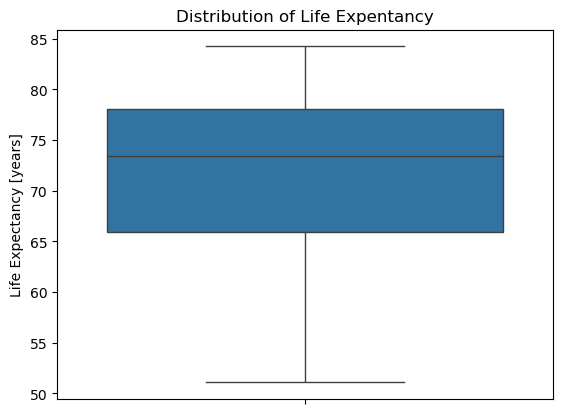

In [24]:
# show distribution of life expectancy in a boxplot

plt.title('Distribution of Life Expentancy')
plt.ylabel('Life Expectancy [years]')
sns.boxplot(data=df.life_exp);
plt.show()

There is a relative wide spread between minimum life expectancy of 51 years and maximum life expectancy of 84 years within the 210 countries.

The median of 73 years is relatively high and closer to the maximum than to the minimum. This means that the life expectancy in 50% of the countries is higher than 73 years.

Let's have a look on

2. Are there regional differences or patterns?

In [27]:
# list the 10 countries with the highes life expectancy

df_life_exp_country_high = df[["country_name", "life_exp"]].sort_values(by=['life_exp'], ascending = False).head(10)
df_life_exp_country_high

,country_name,life_exp
86,"Hong Kong SAR, China",84.252683
117,"Macao SAR, China",83.984000
98,Japan,83.793902
188,Switzerland,82.897561
179,Spain,82.831707
171,Singapore,82.743902
114,Liechtenstein,82.656098
96,Italy,82.543902
88,Iceland,82.468293
10,Australia,82.400000


In [28]:
# list the 10 countries with the highes life expectency

df_life_exp_country_low = df[["country_name", "life_exp"]].sort_values(by=['life_exp'], ascending = False).tail(10)
df_life_exp_country_low

,country_name,life_exp
81,Guinea,58.134
47,Cote d'Ivoire,57.762
170,Sierra Leone,57.189
178,South Sudan,55.566
63,Eswatini,55.019
176,Somalia,54.857
37,Central African Republic,52.793
144,Nigeria,51.841
38,Chad,51.589
111,Lesotho,51.101


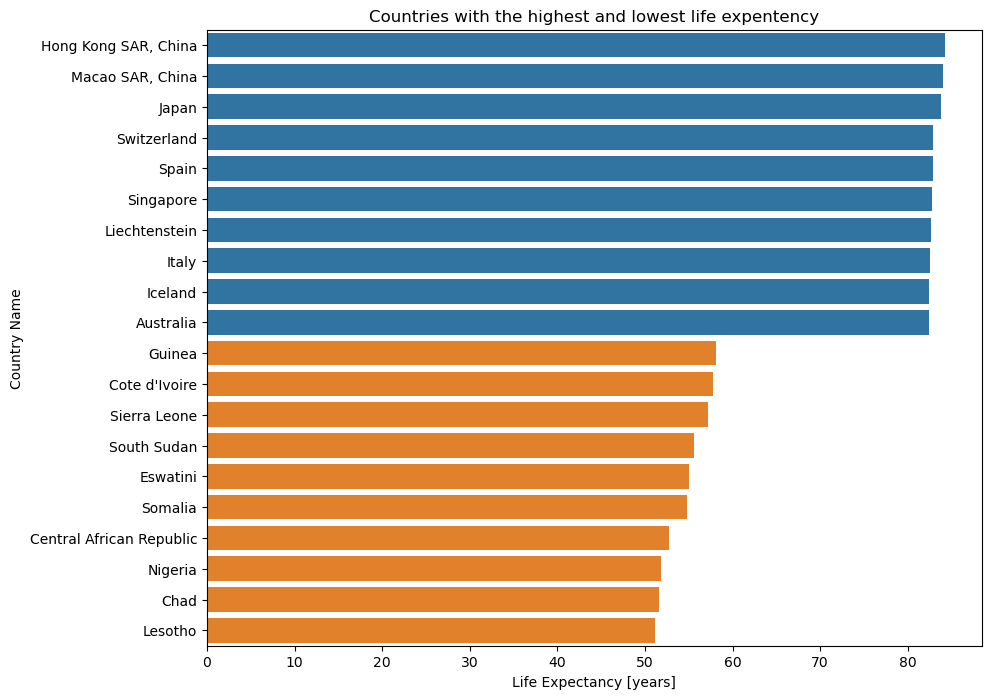

In [29]:
# plot in two separate diagrams

plt.figure(figsize = [10, 8]) 

plt.title('Countries with the highest and lowest life expentency')
plt.xlabel('Life Expectancy [years]')
plt.ylabel('Country Name')
sns.barplot(x="life_exp", y="country_name", data=df_life_exp_country_high)
sns.barplot(x="life_exp", y="country_name", data=df_life_exp_country_low)
plt.show()

Life expectancy seems to be reginal distributed. While the countries with the highest life expectancies in the world are located in the global north, especially in Europe and Asia. The countries with the lowest life expectancy are all located in the global south, especially in Africa.

Let's have a look on

3. Which features support life expectancy?

In [32]:
# remove features which are not continous data or relevant anymore

df = df.drop(['time', 'time_code', 'country_name', 'country_code'], axis=1)

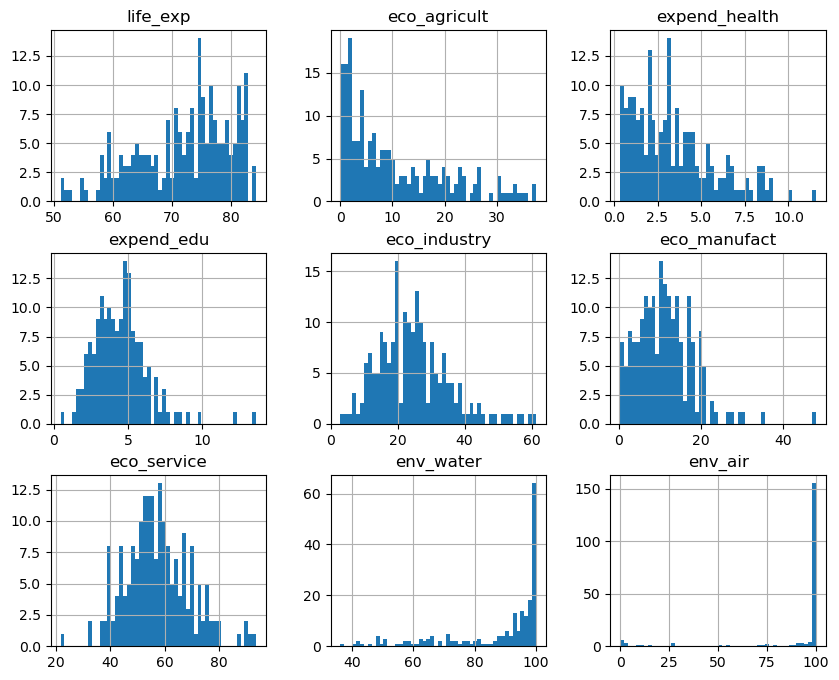

In [33]:
# plot histograms of the features with matplotlib to see their distributions

df.hist(bins=50, figsize=(10, 8))
plt.show()

In [34]:
# calculate correlation between features

corr_matrix = df.corr()
corr_matrix["life_exp"].sort_values(ascending=False)

life_exp         1.000000
env_water        0.815835
expend_health    0.610696
eco_service      0.575254
expend_edu       0.199092
eco_manufact     0.081861
eco_industry    -0.033442
env_air         -0.390652
eco_agricult    -0.693006
Name: life_exp, dtype: float64

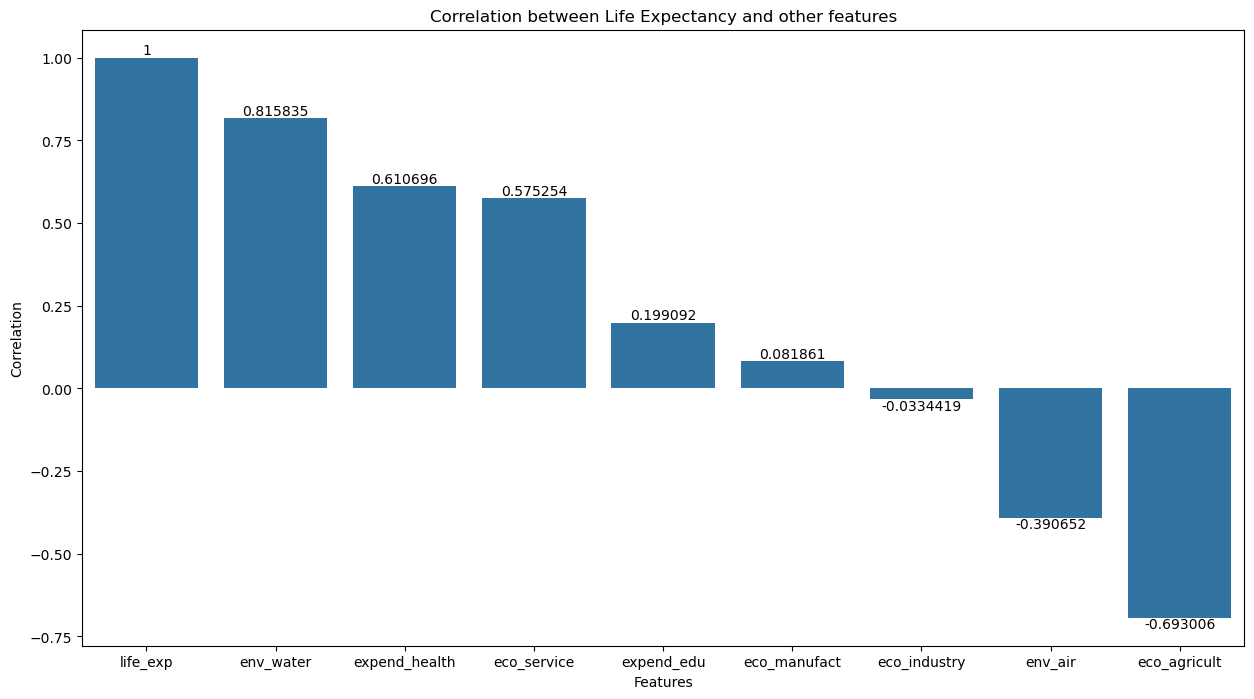

In [35]:
# plot correlation between features

plt.figure(figsize=(15, 8))

ax = sns.barplot(data=corr_matrix["life_exp"].sort_values(ascending=False))
ax.bar_label(ax.containers[0])
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.title('Correlation between Life Expectancy and other features')
plt.show()

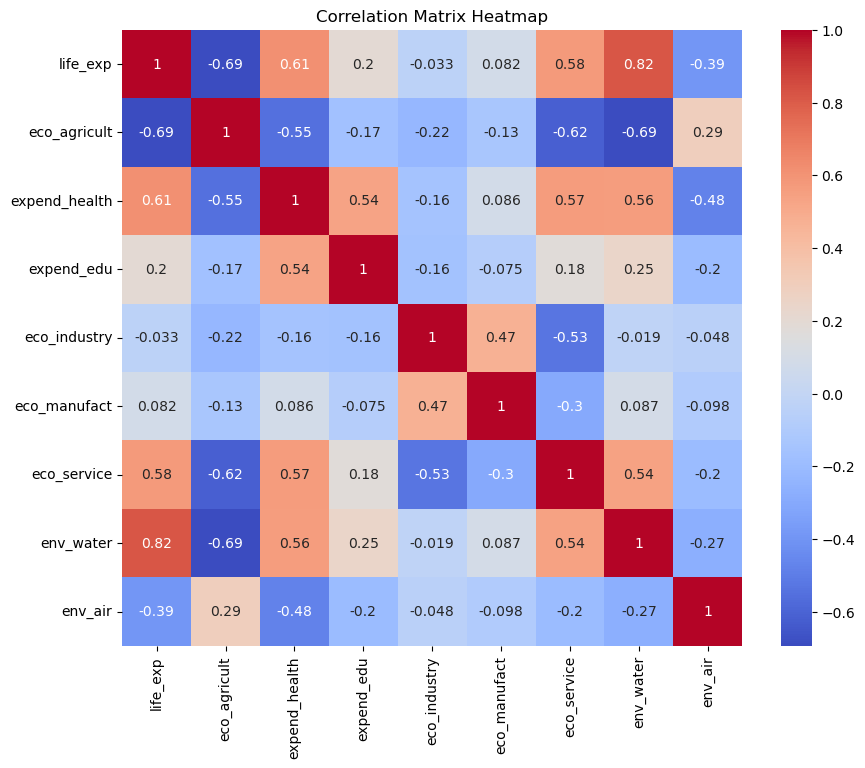

In [36]:
# calculate correlation and plot the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Features like government expenditure on education, air pollution or economic show a weak correlation.

The strongest correlation between life expectancy and other features exists between the usage of at least basic drinking water services `env_water` (0.82) and the domestic general government health expenditure `expend_health` (0.61). 

Moreover, features basic drinking water services and domestic general government health expenditure show a moderate multicollinearity (0.57). To avoid misleading coefficients I decide to use basic drinking water services `env_water` (0.82) as my independent variable.

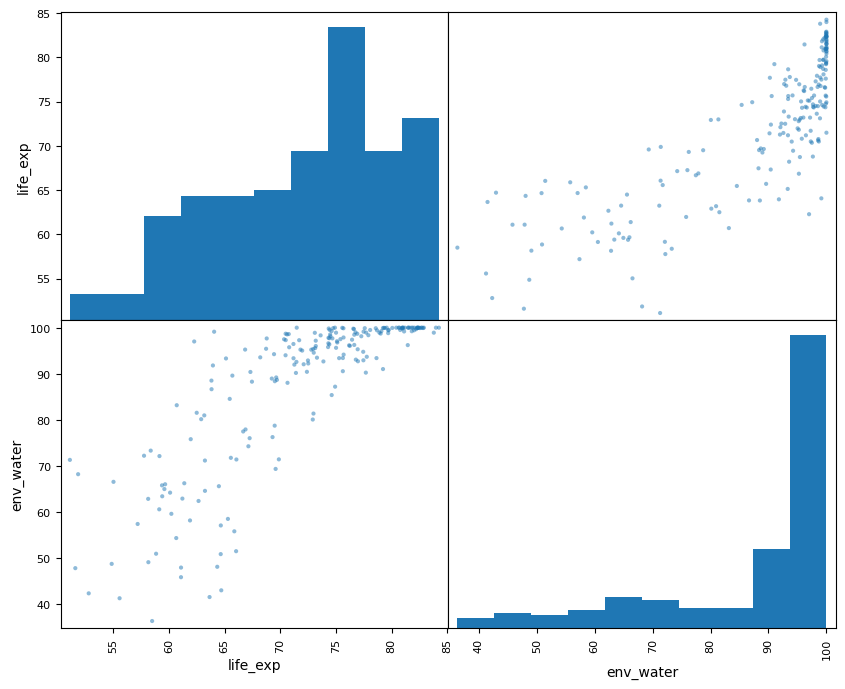

In [38]:
# plot the results

features = ["life_exp", "env_water"]
scatter_matrix(df[features], figsize=(10, 8))
plt.show()

In [39]:
# check null values again

df.isnull().sum()

life_exp          0
eco_agricult     14
expend_health    28
expend_edu       45
eco_industry     11
eco_manufact     22
eco_service      13
env_water         4
env_air          19
dtype: int64

The only relevant variable is basic drinking water services with 4 null values, which are ~ 2%. Because of the small amount I decide for a removement of lines with missing values.

In [41]:
# drop null value in env_water

df_na = df.index[df.env_water.isnull()]
df.drop(df_na, inplace = True)

In [42]:
# check null values

df.isnull().sum()

life_exp          0
eco_agricult     13
expend_health    25
expend_edu       43
eco_industry     10
eco_manufact     21
eco_service      12
env_water         0
env_air          16
dtype: int64

There are no null values in the future target variable `life_exp` and the feature `env_water`.

After that I set the target and independent variable and split it into a test and a training set.

In [44]:
# Set the target, or the y variable

y = df[["life_exp"]].values

In [45]:
# Set the independent variable matrix, X

X = df[["env_water"]].values

In [46]:
# Create your train-test splits

X_train, X_test, y_train, y_test = train_test_split(X,y)

### Modeling

The target and the independent variables are continuous data. There is one independent variable so I choose the linear regression model.

In [49]:
# Generate a linear regression object

lr = LinearRegression()

In [50]:
# train the model with the training data

lr.fit(X_train, y_train)

LinearRegression()

### Evaluation

In this step I evaluate the model. Relevant scores and metrics in regression models are the $R^2$ value and the root mean scared error (RMSE).

- $R^2$ value shows how well the model fits the data. The value has a range of between 0 and 1 and has no unit. Higher values indicate better fitting models.
- RSME value shows the quality of model's predictions. The unit of the value is the unit of the target variable. Values close to 0 indicate better predictions.

I start scoring with the training data.

In [54]:
# make predictions with X_train of the training data

y_train_pred = lr.predict(X_train)

In [55]:
# calculate the r2 value of the training data

train_r2 = lr.score(X_train, y_train)

print(f'training r^2: {train_r2}')

training r^2: 0.6746836757243502


A $R^2$ value of 0.66 shows that 66 % of the variance in the life expectancy variable could be explained by this model. The value closer to 1 indicates a good fitting model.

In [57]:
# calculate the rsme of the training data

train_rmse = root_mean_squared_error(y_train, y_train_pred)

print(f'training rsme: {train_rmse}')

training rsme: 4.439745120980101


A RSME of 4.7 shows that this models predictions are on average off by 4.7 years. A value close to zeros indicates good predictions.

After that I score with the test data.

In [61]:
# make predictions with X_test

y_test_pred = lr.predict(X_test)

In [62]:
# calculate the r2 value of the test data

test_r2 = lr.score(X_test, y_test)

print(f'testing r^2: {test_r2}')

testing r^2: 0.6334301498966957


A $R^2$ value of 0.69 shows that 69 % of the variance in the life expectancy variable could be explained by this model. The value closer to 1 indicates a good fitting model.

In [64]:
# calculate the rsme of the test data

test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f'testing RMSE: {test_rmse}')

testing RMSE: 5.0106611254410325


A RSME of 4.2 shows that this models predictions are on average off by 4.2 years. A value close to zeros indicates good predictions.

The comparison of the $R^2$ value of the training set of 0.66 with the value of the test set of 0.69 show a low deviation and indicates a good fitting model with no over or underfitting.

Let us have a look on

4. How influences an increase of basic drinking water service the life expectancy?

In [68]:
# calculate the coefficient and the increase of the regression line

lr.coef_

array([[0.37378046]])

An increase of basic drinking water service of 1% of the people in a country increases the life expectancy in this country by 0.39 years.

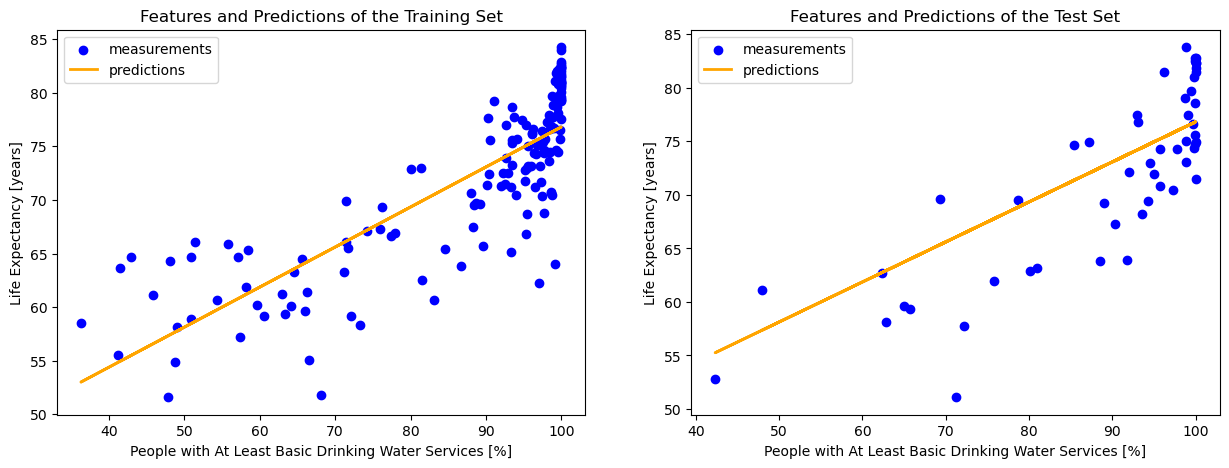

In [70]:
# plot training and test set and predictions in two separate diagrams

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.title('Features and Predictions of the Training Set')
plt.scatter(X_train, y_train, color='blue', label='measurements')
plt.plot(X_train, y_train_pred, color='orange', linewidth=2, label='predictions')
plt.ylabel("Life Expectancy [years]")
plt.xlabel('People with At Least Basic Drinking Water Services [%]')
plt.legend(loc="upper left")

plt.subplot(1, 2, 2)
plt.title('Features and Predictions of the Test Set')
plt.scatter(X_test, y_test, color='blue', label='measurements')
plt.plot(X_test, y_test_pred, color='orange', linewidth=2, label='predictions')
plt.ylabel("Life Expectancy [years]")
plt.xlabel('People with At Least Basic Drinking Water Services [%]')
plt.legend(loc="upper left")
plt.show()

In [71]:
# calculate the maximum predicted life epentency by the model

lr.predict([[100]])

array([[76.81660958]])

The visual assessment of the diagram shows the limit of the model:

- Basically, the model is not able to predict life expectancy older than 76.9 years, but the basic water drinking service is not increasable higher than 100%. It is obviously that there are a lot countries in the developed world which have a basic water drinking service of almost 100% and a life expectancy of more than 76,9 years. In these cases the model is unable to make good predictions.

### Deployment

Let us use the model in this new scenario:

The United Nations (UN) noticed that access to basic drinking water services supports life expectancy in the countries of the world. The UN decides to help underdeveloped countries to enable people access to basic drinking service and increase it to at least 75% of the people per country.

So, let us have a look on

5. What happens if the basic water service is offered at least 75% of the people in the world?

In [76]:
# generate a scenario feature column from the env_water feature

df['env_water_scen'] = df['env_water'].apply(lambda x: 75 if x < 75 else x)

In [77]:
# generate a new independant variable X_scen and make predictions

X_scen = df['env_water_scen'].values
y_pred_scen = lr.predict(X_scen.reshape(-1, 1))

In [78]:
# include prediction as new column in df

df["pred_scen"] = pd.DataFrame(y_pred_scen)

In [79]:
# calculate descriptive statistics

df[["life_exp", "pred_scen"]].describe()

,life_exp,pred_scen
count,206.000000,195.000000
mean,71.871221,73.373416
std,7.930394,3.701160
min,51.101000,67.472098
25%,65.741000,69.112694
50%,73.189000,75.064020
75%,77.877750,76.533999
max,84.252683,76.816610


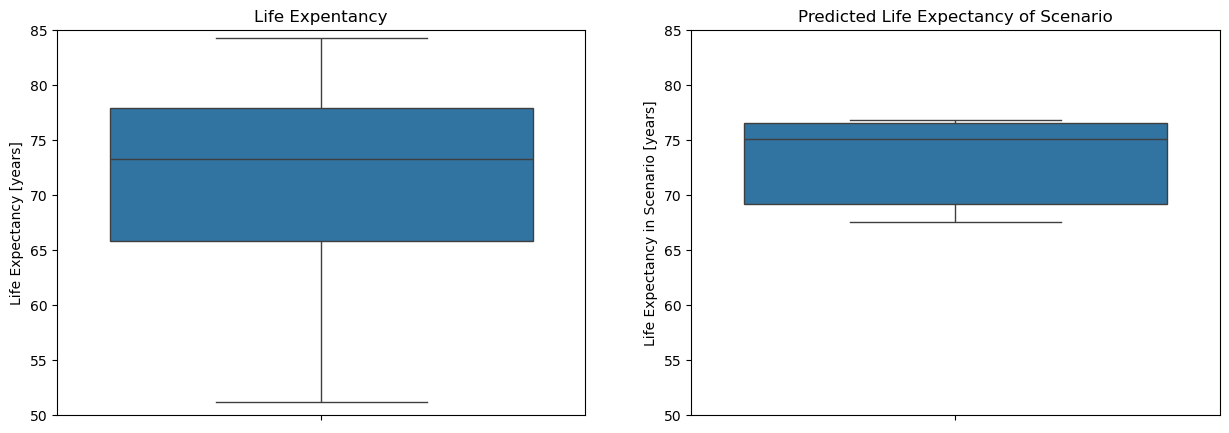

In [80]:
# plot both columns in a boxplot diagram

plt.figure(figsize = [15, 5]) 

# subplot 1

plt.subplot(1, 2, 1)
#plt.xlabel('Life Expectancy')
plt.ylabel('Life Expectancy [years]')
plt.ylim(50, 85)
plt.title('Life Expentancy')
sns.boxplot(data=df["life_exp"])

# subplot 2

plt.subplot(1, 2, 2)
plt.ylabel('Life Expectancy in Scenario [years]')
plt.ylim(50, 85)
plt.title('Predicted Life Expectancy of Scenario')
sns.boxplot(data=df["pred_scen"])
plt.show()

The assumption of the scenario has a huge impact on the life expectancy of the world in comparison to the actually life expectancy:

- The minimum increases from 51 years to 67 years and
- The medium increases from 71 to 73 years.

Noticeable is that the maximum life expectancy decreases from 84 years to ~ 77 years. This issue was discussed earlier and is based in the limitation of the model to predict life expectancy based on access to basic water drinking services of more than 100%.